Lekhana Devi Akuti, Student ID - 300969345
CSCI 166 Project

I chose the Taxi-v3 domain for my project because it provides an accessible yet interesting challenge that fits well with the goals of applying various Q-learning techniques. Starting with this domain allows me to experiment with different reinforcement learning methods and observe how the agent's behavior improves as I progress through the techniques. The environment's straightforward setup—where the agent navigates a 5x5 grid to pick up and drop off passengers—makes it easy to understand and visualize the problem, which is essential for experimentation and analysis.

I initially applied Q-learning to this domain, where the agent learns an optimal policy by updating the Q-values through exploration and exploitation. The small, discrete state space (500 states) makes it ideal for traditional Q-learning, allowing the agent to efficiently learn from experience. From there, I progressed to Approximate Q-learning as I scaled up the complexity, using linear function approximation to handle larger or continuous state spaces. This step helped me understand the limitations of traditional Q-learning and how to deal with environments where a full Q-table becomes impractical.

Finally, I implemented Deep Q-Learning to address the challenge of more complex, high-dimensional spaces. By incorporating neural networks, I was able to apply a more advanced reinforcement learning technique that can generalize across larger environments, where the state space is vast or difficult to represent with simple tables. The Taxi-v3 domain offers the right balance between simplicity and complexity, making it a perfect fit for applying and comparing different Q-learning methods in a coherent and manageable way. Through this progression, I gained deeper insights into reinforcement learning, while also improving the agent's performance in a fun and practical environment.

In [27]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
import time
import tensorflow as tf
import random
import keras 
from collections import deque
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
# Initialize the Taxi environment
env = gym.make("Taxi-v3", render_mode="ansi")
n_states = env.observation_space.n
n_actions = env.action_space.n

In [3]:
# Initialize Q-table
q_table = np.zeros((n_states, n_actions))

After trying out different combinations, I found that these hyperparameters felt just right for Q-learning in the Taxi domain. The learning rate, set to 0.1, allows the agent to learn steadily without making drastic changes with every step. The discount factor, set to 0.95, works well because it balances the importance of immediate versus future rewards, which is key for making good decisions in this environment. Starting with a high exploration rate of 1.0 gave the agent the freedom to explore more at the beginning, while the gradual decay of 0.995 ensures it starts relying on learned knowledge over time. The minimum exploration rate of 0.1 still leaves room for occasional exploration to avoid getting stuck in suboptimal strategies. With 1000 episodes and a cap of 100 steps per episode, this setup felt like a perfect middle ground to get consistent and improving results.

In [4]:
# Hyperparameters for Q learning
alpha = 0.1  # Learning rate
gamma = 0.95  # Discount factor
epsilon = 1.0  # Exploration rate
epsilon_decay = 0.995
epsilon_min = 0.1
n_episodes = 1000
max_steps = 100

This Q-learning algorithm helps the agent learn by interacting with the Taxi environment over many episodes. At the start of each episode, the environment resets, and the agent starts fresh. During each step, the agent decides whether to explore a random action or use what it already knows to pick the best action. This decision is guided by a value called epsilon, which starts high to encourage exploration and decreases over time as the agent learns.

When the agent takes an action, it gets feedback in the form of a reward, the next state, and whether the episode is finished. The Q-value for that action is updated based on the reward received and the potential for future rewards. The learning rate (alpha) controls how much the agent adjusts its values, while the discount factor (gamma) ensures it values future rewards.

After each episode, the algorithm records the total reward earned and adjusts epsilon slightly to encourage more focused decisions later. Over time, as the agent learns, I can see the rewards increase, showing how it’s improving at completing the task. It’s a straightforward process of learning by trial and error, refining strategies with each episode.

In [5]:
# Initialize a list to store total rewards per episode
rewards = []

In [6]:
# Q-Learning algorithm
for episode in range(n_episodes):
    state, _ = env.reset()
    total_reward = 0  # Initialize total reward for the episode
    for step in range(max_steps):
        # Epsilon-greedy action selection
        if np.random.random() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])
        
        # Perform action
        next_state, reward, done, _, _ = env.step(action)
        
        # Update Q-value
        q_table[state, action] += alpha * (
            reward + gamma * np.max(q_table[next_state]) - q_table[state, action]
        )
        
        total_reward += reward  # Accumulate the reward for the episode
        state = next_state
        
        if done:
            break
    
    # Store the total reward for the episode
    rewards.append(total_reward)
    
    # Update epsilon
    epsilon = max(epsilon * epsilon_decay, epsilon_min)
    print(f"Episode {episode}/{n_episodes}, Total Reward: {total_reward}, Epsilon: {epsilon:.3f}")
    

print("Training complete!")

Episode 0/1000, Total Reward: -406, Epsilon: 0.995
Episode 1/1000, Total Reward: -361, Epsilon: 0.990
Episode 2/1000, Total Reward: -325, Epsilon: 0.985
Episode 3/1000, Total Reward: -442, Epsilon: 0.980
Episode 4/1000, Total Reward: -370, Epsilon: 0.975
Episode 5/1000, Total Reward: -433, Epsilon: 0.970
Episode 6/1000, Total Reward: -451, Epsilon: 0.966
Episode 7/1000, Total Reward: -433, Epsilon: 0.961
Episode 8/1000, Total Reward: -334, Epsilon: 0.956
Episode 9/1000, Total Reward: -406, Epsilon: 0.951
Episode 10/1000, Total Reward: -388, Epsilon: 0.946
Episode 11/1000, Total Reward: -397, Epsilon: 0.942
Episode 12/1000, Total Reward: -379, Epsilon: 0.937
Episode 13/1000, Total Reward: -352, Epsilon: 0.932
Episode 14/1000, Total Reward: -397, Epsilon: 0.928
Episode 15/1000, Total Reward: -388, Epsilon: 0.923
Episode 16/1000, Total Reward: -352, Epsilon: 0.918
Episode 17/1000, Total Reward: -433, Epsilon: 0.914
Episode 18/1000, Total Reward: -397, Epsilon: 0.909
Episode 19/1000, Total

When I tried running the training loop multiple times without resetting the Q-table, I noticed something interesting—each time, the rewards improved significantly, and the graph changed to show better performance. It seems like the Q-table was retaining the knowledge it had already gained, so when I ran the training again, the agent started from a much better position. In the first run, it explored a lot, with epsilon slowly decreasing to allow it to exploit what it had learned. But by the second run, epsilon was already low, so the agent mostly relied on what it had learned, leading to higher rewards and smoother progress. Although the graph changed and the rewards increased drastically, this made sense because the agent was just building on its previous learning. It’s like the model was improving step by step, which felt really satisfying to see!

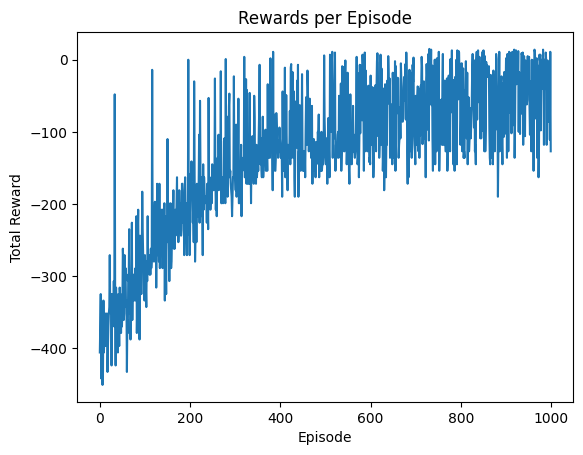

In [7]:
# 1. Plot Rewards
plt.plot(rewards)
plt.title("Rewards per Episode")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.show()

In [8]:
# 2. Display Learned Q-Values
print("Learned Q-Table:")
print(q_table)

Learned Q-Table:
[[ 0.          0.          0.          0.          0.          0.        ]
 [-3.89802488 -3.98883924 -3.93257211 -3.98259047 -3.85716179 -9.37616505]
 [-1.93524769 -1.94322283 -2.19237624 -1.9740009   7.13220282 -5.3261819 ]
 ...
 [-1.33228084 -1.2265145  -1.31653023 -1.2676682  -4.18137315 -4.85452698]
 [-2.66694209 -2.63698871 -2.68451336 -2.68865412 -5.00551351 -5.95040559]
 [-0.19       -0.28905    -0.1        -0.1        -1.9         0.        ]]


I visualized the Q-learning process by running 5 episodes to observe how the agent's behavior evolved. Every 10th step, I rendered the environment to display the agent's state, action, and reward. This allowed me to see how the agent's decisions improved over time as it learned from its experiences, giving me a clearer understanding of how the Q-values influence its actions and overall performance.

In [49]:
# Visualize a single episode for 5 different episodes
for episode in range(5):  # Visualize 5 episodes
    state, _ = env.reset()  # Initialize environment and get initial state
    done = False
    print(f"--- Visualizing Episode {episode + 1} ---")
    step = 0
    
    while not done and step < max_steps:
        # Select the action with the highest Q-value using the linear function approximation
        action = np.argmax(q_table[state])  # Using the Q-table directly for action selection

        
        # Perform action and get next state, reward, and done flag
        next_state, reward, done, _, _ = env.step(action)
        
        # Render every 10 steps to reduce overload
        if step % 10 == 0:
            print(f"Step {step}, State: {state}, Action: {action}, Reward: {reward}")
            print(env.render())  # Render the environment to show the state
            time.sleep(0.2)  # Add a short delay for visualization clarity
        
        state = next_state
        step += 1

print("Visualization complete!")

--- Visualizing Episode 1 ---
Step 0, State: 182, Action: 1, Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Step 10, State: 82, Action: 1, Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Step 20, State: 82, Action: 1, Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Step 30, State: 82, Action: 1, Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Step 40, State: 82, Action: 1, Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

--- Visualizing Episode 2 ---
Step 0, State: 213, Action: 1, Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Step 10, State: 33, Action: 2, Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---

For my Approximate Q-learning experiment, I set the learning rate (alpha) to 0.1, which allowed the model to gradually learn without overshooting the optimal Q-values. The discount factor (gamma) was set to 0.99 to emphasize future rewards and encourage long-term planning. I initialized the exploration rate (epsilon) at 1.0 to promote exploration and set epsilon_decay to 0.995 to gradually reduce exploration as the agent becomes more confident in its policy, while maintaining a minimum epsilon of 0.01 to ensure some continued exploration. I chose 1000 episodes and limited each to 100 steps, providing ample learning opportunities while preventing excessive computation. Through experimentation, I found these hyperparameters provided a good balance between exploration and exploitation, leading to stable and improving performance.

In [10]:
# Set parameters
n_actions = env.action_space.n  # Number of actions
n_states = env.observation_space.n  # Number of states (discrete, but we treat them as features)
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Epsilon for epsilon-greedy policy
epsilon_decay = 0.995
epsilon_min = 0.01
n_episodes = 1000
max_steps = 100  # Max steps per episode

In my Approximate Q-learning setup, I used linear function approximation for Q-values, where each action-state pair has a corresponding weight stored in a 2D array, "weights". Instead of maintaining a Q-table, the model estimates Q-values by computing the weighted sum of features for each state-action pair. This method helps generalize learning in large or continuous state spaces, where storing explicit Q-values for every pair is impractical.

In [11]:
# Linear function approximation for Q-values (weights for each action-state pair)
weights = np.zeros((n_actions, n_states))  # weights for each action-state pair

The feature function in this setup uses a simple one-hot encoding approach to represent states. In the Taxi-v3 environment, the state is a single integer, and the feature function converts this into a vector where the element corresponding to the current state is set to 1, while all other elements are set to 0. This one-hot encoding effectively turns the state into a sparse vector, with each state having a unique representation in the feature space. This representation simplifies the process of approximating Q-values for each state-action pair.

In [12]:
# Feature function (identity for simplicity)
def feature_function(state):
    # In Taxi-v3, the state is a single integer, so we use one-hot encoding as the feature
    features = np.zeros(n_states)
    features[state] = 1  # One-hot encoding of the state
    return features

The epsilon_greedy function selects an action based on an epsilon-greedy policy, which balances exploration and exploitation. If a randomly generated number is smaller than epsilon, the agent will choose a random action (exploration). Otherwise, it will choose the action that maximizes the Q-value (exploitation). The Q-values are calculated by taking the dot product of the weights (representing the learned importance of each state-action pair) and the feature vector for the current state, which in this case is a one-hot encoding of the state. The action with the highest Q-value is selected, guiding the agent towards more favorable decisions based on past experiences.

In [13]:
# Epsilon-greedy action selection
def epsilon_greedy(state, epsilon):
    if np.random.rand() < epsilon:
        return env.action_space.sample()  # Random action
    else:
        # Calculate Q-values using the linear approximation
        q_values = np.dot(weights, feature_function(state))  # Linear combination of state features and weights
        return np.argmax(q_values)  # Choose the action with the highest Q-value

Here I implemented Approximate Q-learning using linear function approximation. Instead of storing Q-values for each state-action pair, the algorithm adjusts weights for each action-state combination. The agent follows an epsilon-greedy policy, where it either explores (chooses a random action) or exploits (selects the action with the highest Q-value). The Q-values are calculated using a dot product between the action's weights and the features of the current state, which are represented using one-hot encoding.

After performing an action, the agent receives a reward and transitions to a new state. The Q-value for the chosen action is updated using the Bellman equation, where the target Q-value is the immediate reward plus the discounted maximum Q-value from the next state. The difference between the current and target Q-value (TD error) is used to update the weights.

The epsilon value decays over time, reducing exploration and increasing exploitation as the agent becomes more confident in its actions. The total reward for each episode is tracked, and progress is logged every 10 episodes, displaying the current episode, total reward, and epsilon value. Ultimately, this algorithm allows the agent to learn optimal policies by adjusting its weights based on the rewards it receives.

In [14]:
episode_rewards = []

In [15]:
#Approximate Q learning
# Q-learning with linear function approximation
for episode in range(n_episodes):
    state, _ = env.reset()  # Initialize environment and get initial state (state is a tuple)
    total_reward = 0
    state = int(state)  # Ensure state is an integer for the discrete state space

    for step in range(max_steps):
        # Select action using epsilon-greedy policy
        action = epsilon_greedy(state, epsilon)

        # Perform action and get next state and reward
        next_state, reward, done, _, _ = env.step(action)
        next_state = int(next_state)  # Ensure next state is an integer

        # Calculate target Q-value
        next_features = feature_function(next_state)
        q_target = reward + gamma * np.dot(weights, next_features).max()  # Bellman equation

        # Calculate current Q-value for the chosen action
        current_features = feature_function(state)
        q_current = np.dot(weights[action], current_features)

        # Compute gradient (TD error) and update weights
        error = q_target - q_current
        weights[action] += alpha * error * current_features  # Update weights for the chosen action

        # Update state
        state = next_state
        total_reward += reward

        if done:
            break

    # Add the total reward for this episode to the episode_rewards list
    episode_rewards.append(total_reward)

    # Decay epsilon after each episode
    epsilon = max(epsilon * epsilon_decay, epsilon_min)

    # Log progress
    if episode % 10 == 0:
        print(f"Episode {episode}/{n_episodes}, Total Reward: {total_reward}, Epsilon: {epsilon:.3f}")


print("Training complete!")


Episode 0/1000, Total Reward: -388, Epsilon: 0.995
Episode 10/1000, Total Reward: -297, Epsilon: 0.946
Episode 20/1000, Total Reward: -406, Epsilon: 0.900
Episode 30/1000, Total Reward: -352, Epsilon: 0.856
Episode 40/1000, Total Reward: -343, Epsilon: 0.814
Episode 50/1000, Total Reward: -316, Epsilon: 0.774
Episode 60/1000, Total Reward: -370, Epsilon: 0.737
Episode 70/1000, Total Reward: -289, Epsilon: 0.701
Episode 80/1000, Total Reward: -334, Epsilon: 0.666
Episode 90/1000, Total Reward: -298, Epsilon: 0.634
Episode 100/1000, Total Reward: -307, Epsilon: 0.603
Episode 110/1000, Total Reward: -217, Epsilon: 0.573
Episode 120/1000, Total Reward: -307, Epsilon: 0.545
Episode 130/1000, Total Reward: -316, Epsilon: 0.519
Episode 140/1000, Total Reward: -316, Epsilon: 0.493
Episode 150/1000, Total Reward: -217, Epsilon: 0.469
Episode 160/1000, Total Reward: -226, Epsilon: 0.446
Episode 170/1000, Total Reward: -217, Epsilon: 0.424
Episode 180/1000, Total Reward: -244, Epsilon: 0.404
Epis

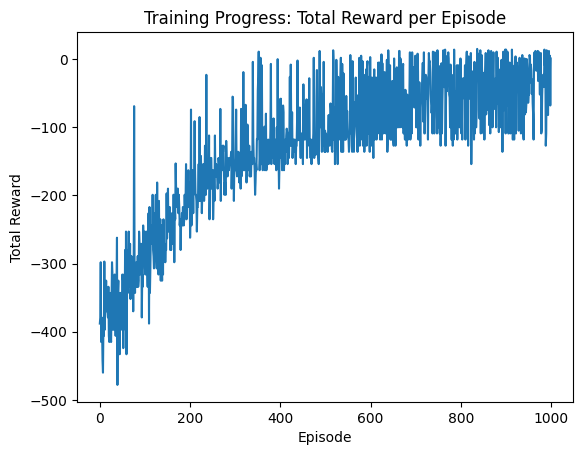

In [16]:
plt.plot(range(n_episodes), episode_rewards)
plt.title("Training Progress: Total Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.show()

This code block helps visualize the agent's behavior over 5 episodes. For each episode, it resets the environment and uses an epsilon-greedy policy with epsilon set to 0 (pure exploitation). The agent takes actions, receives rewards, and updates the state. Every 10 steps, the environment is rendered, and the current state, action, and reward are printed with a short delay for clarity. This helps observe how the agent performs after learning, confirming its ability to exploit the optimal strategy.

In [17]:
# Visualizing Approximate Q-Learning
for episode in range(5):  # Visualize 5 episodes
    state, _ = env.reset()  # Initialize environment and get initial state
    done = False
    print(f"--- Visualizing Episode {episode + 1} ---")
    step = 0
    
    while not done and step < max_steps:
        # Select the action with the highest Q-value using the linear function approximation
        action = epsilon_greedy(state, epsilon=0.0)  # Epsilon is 0 for exploitation
        
        # Perform action and get next state, reward, and done flag
        next_state, reward, done, _, _ = env.step(action)
        
        # Render every 10 steps to reduce overload
        if step % 10 == 0:
            print(f"Step {step}, State: {state}, Action: {action}, Reward: {reward}")
            print(env.render())  # Render the environment to show the state
            time.sleep(0.2)  # Add a short delay for visualization clarity
        
        state = next_state
        step += 1

print("Visualization complete!")

--- Visualizing Episode 1 ---
Step 0, State: 62, Action: 0, Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Step 10, State: 62, Action: 0, Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Step 20, State: 62, Action: 0, Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Step 30, State: 62, Action: 0, Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Step 40, State: 62, Action: 0, Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Step 50, State: 62, Action: 0, Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Step 60, State: 62, Action: 0, Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Step 70, Sta


For Deep Q-Learning with a neural network, I set up the following hyperparameters to guide the training process. The gamma (discount factor) is set to 0.95, balancing future and immediate rewards. Epsilon starts at 1.0, allowing for full exploration of the action space, and decays gradually with epsilon_decay at 0.995 to shift towards exploitation over time, with a lower bound of epsilon_min at 0.1. The training runs for n_episodes of 1000, with a maximum of max_steps 100 per episode to prevent infinite loops. The batch_size of 32 allows the neural network to learn from multiple experiences in one pass, while the learning_rate of 0.001 ensures the model updates weights at an appropriate pace to converge smoothly. These hyperparameters are chosen to strike a balance between exploration and exploitation, efficiency in training, and model performance

In [29]:
# Hyperparameters for Deep Q-Learning
gamma = 0.95
epsilon = 1.0
epsilon_decay = 0.995
epsilon_min = 0.1
n_episodes = 1000
max_steps = 100
batch_size = 32
learning_rate = 0.001


The DQN (Deep Q-Network) model is defined using a simple neural network architecture. It consists of two fully connected layers. The first layer (fc1) takes in the state space (with n_states input features) and maps it to 128 hidden units. The second layer (fc2) outputs the Q-values for each action, with the size of the output corresponding to the number of possible actions (n_actions). The forward pass applies a ReLU activation after the first layer to introduce non-linearity, allowing the model to learn more complex patterns, before outputting the Q-values from the second layer. This network architecture enables the model to approximate the Q-values for each state-action pair, which is essential for Deep Q-Learning.

In [30]:
# Define the DQN model
class DQN(nn.Module):
    def __init__(self, n_states, n_actions):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(n_states, 128)
        self.fc2 = nn.Linear(128, n_actions)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

The one_hot_state function converts a discrete state into a one-hot encoded tensor. It creates a tensor of size (1, n_states), where n_states is the total number of possible states in the environment. The function sets the value at the index corresponding to the given state to 1, while all other indices remain 0. This transformation is important for neural networks, as it represents the state in a format that can be used as input to the model, where each state is represented by a unique binary vector. This method is commonly used in reinforcement learning to represent states in a way that neural networks can process

In [31]:
def one_hot_state(state, n_states):
    # Return a 2D tensor with shape (1, n_states) for a single state
    one_hot = torch.zeros(1, n_states)  # 1 batch and n_states features
    one_hot[0, state] = 1
    return one_hot


I initialized the neural networks by creating two instances of the DQN class: policy_net and target_net. The policy_net is the network that will be trained and improved over time to make decisions, while the target_net serves as a stable reference to avoid instability during training. Initially, I set the weights of target_net to be the same as those of policy_net to ensure consistency. I also set up the optimizer (Adam) with a learning rate of 0.001 for updating the policy_net's weights, and the loss function used is Mean Squared Error (MSE), which will calculate the error between the predicted and target Q-values during training.

In [32]:
# Initialize networks and optimizer
policy_net = DQN(n_states, n_actions)
target_net = DQN(n_states, n_actions)
target_net.load_state_dict(policy_net.state_dict())
optimizer = optim.Adam(policy_net.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

I set up a replay buffer using a deque to store experiences (state, action, reward, next state, done) with a maximum size of 10,000. During each episode, I followed the epsilon-greedy policy to choose actions, where exploration happens with a probability of epsilon, and exploitation is done by selecting the action with the highest Q-value using the policy network. After performing an action, the experience is stored in the replay buffer and updated the state.

Once the replay buffer has enough samples (batch size), I sampled a mini-batch of experiences to train the policy network. The states and next states were one-hot encoded, and then calculated the target Q-values using the Bellman equation. These were compared to the Q-values predicted by the policy network, and the network was updated by backpropagating the loss. The algorithm also decayed epsilon after each episode to gradually shift from exploration to exploitation.

Every 10 episodes, the code updated the target network to match the policy network's weights to stabilize training. The loop continued for n_episodes, and after completion, the model was fully trained.

In [33]:
# Replay buffer
replay_buffer = deque(maxlen=10000)

In [48]:
#Deep Q-Learning 
# Training loop
for episode in range(n_episodes):
    state, _ = env.reset()
    state = one_hot_state(state, n_states)  # One-hot encode state (batch size = 1)
    total_reward = 0

    for step in range(max_steps):
        # Epsilon-greedy action selection
        if np.random.random() < epsilon:
            action = env.action_space.sample()
        else:
            with torch.no_grad():
                action = torch.argmax(policy_net(state)).item()

        # Perform action
        next_state, reward, done, _, _ = env.step(action)
        next_state = one_hot_state(next_state, n_states)  # One-hot encode next state

        # Append to replay buffer
        replay_buffer.append((state, action, reward, next_state, done))
        total_reward += reward

        # Update state
        state = next_state

        if len(replay_buffer) > batch_size:
            # Sample mini-batch from replay buffer
            batch = random.sample(replay_buffer, batch_size)
            states, actions, rewards, next_states, dones = zip(*batch)
            
            # Ensure states and next_states are 2D tensors (shape: [1, n_states])
            states = [s if s.dim() == 2 else s.unsqueeze(0) for s in states]  # Add a batch dimension if missing
            next_states = [ns if ns.dim() == 2 else ns.unsqueeze(0) for ns in next_states]  # Same for next states
            

            # Concatenate over batch dimension
            states = torch.cat([s for s in states], dim=0)
            next_states = torch.cat([ns for ns in next_states], dim=0)
            actions = torch.tensor(actions)
            rewards = torch.tensor(rewards, dtype=torch.float32)
            dones = torch.tensor(dones, dtype=torch.float32)

            # Compute target Q-values
            q_targets = rewards + gamma * torch.max(target_net(next_states), dim=1)[0] * (1 - dones)

            # Update policy network
            q_values = policy_net(states).gather(1, actions.unsqueeze(1)).squeeze()
            loss = criterion(q_values, q_targets)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if done:
            break

    # Update epsilon
    epsilon = max(epsilon * epsilon_decay, epsilon_min)

    # Update target network periodically
    if episode % 10 == 0:
        target_net.load_state_dict(policy_net.state_dict())
        print(f"Episode {episode}/{n_episodes}, Total Reward: {total_reward}, Epsilon: {epsilon:.3f}")

print("Training complete!")


Episode 0/1000, Total Reward: -15, Epsilon: 0.100
Episode 10/1000, Total Reward: -59, Epsilon: 0.100
Episode 20/1000, Total Reward: -8, Epsilon: 0.100
Episode 30/1000, Total Reward: 6, Epsilon: 0.100
Episode 40/1000, Total Reward: -50, Epsilon: 0.100
Episode 50/1000, Total Reward: -4, Epsilon: 0.100
Episode 60/1000, Total Reward: 11, Epsilon: 0.100
Episode 70/1000, Total Reward: 8, Epsilon: 0.100
Episode 80/1000, Total Reward: -59, Epsilon: 0.100
Episode 90/1000, Total Reward: 6, Epsilon: 0.100
Episode 100/1000, Total Reward: -59, Epsilon: 0.100
Episode 110/1000, Total Reward: -50, Epsilon: 0.100
Episode 120/1000, Total Reward: 7, Epsilon: 0.100
Episode 130/1000, Total Reward: 8, Epsilon: 0.100
Episode 140/1000, Total Reward: -26, Epsilon: 0.100
Episode 150/1000, Total Reward: -59, Epsilon: 0.100
Episode 160/1000, Total Reward: 5, Epsilon: 0.100
Episode 170/1000, Total Reward: 12, Epsilon: 0.100
Episode 180/1000, Total Reward: -5, Epsilon: 0.100
Episode 190/1000, Total Reward: -26, Eps

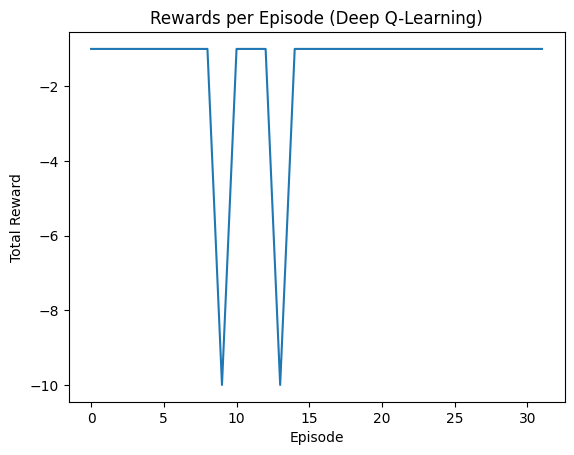

In [35]:
# Rewards Plot
plt.plot(rewards)
plt.title("Rewards per Episode (Deep Q-Learning)")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.show()


In this code block, I visualized the Deep Q-learning agent’s performance over five episodes. For each episode, the environment is reset, and the agent decides its actions based on the Q-values from its policy network. It selects the action with the highest Q-value (exploitation). After taking an action, the agent receives feedback—new state and reward—and updates its knowledge. The environment is rendered every 10 steps to show progress. At the end of each episode, the total reward is printed, giving an insight into the agent's performance. This process is repeated for five episodes to observe the agent's behavior.

In [47]:
# Visualizing Deep Q-learning
for episode in range(5):  # Visualize 5 episodes
    state, _ = env.reset()  # Initialize environment and get initial state
    state = one_hot_state(state, n_states)  # One-hot encode state
    done = False
    total_reward = 0
    print(f"--- Visualizing Episode {episode + 1} ---")
    step = 0

    while not done and step < max_steps:
        # Select the action with the highest Q-value using the policy network
        with torch.no_grad():
            q_values = policy_net(state)  # Get Q-values for all actions
            action = torch.argmax(q_values).item()  # Choose action with highest Q-value
        
        # Perform action and get next state, reward, and done flag
        next_state, reward, done, _, _ = env.step(action)
        next_state = one_hot_state(next_state, n_states)  # One-hot encode next state

        # Render every 10 steps to reduce overload
        if step % 10 == 0:
            print(f"Step {step}, Action: {action}, Reward: {reward}")
            print(env.render())  # Render the environment to show the state
            time.sleep(0.2)  # Add a short delay for visualization clarity
        
        state = next_state
        total_reward += reward
        step += 1

    print(f"Total Reward for Episode {episode + 1}: {total_reward}")

print("Visualization complete!")


--- Visualizing Episode 1 ---
Step 0, Action: 0, Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Step 10, Action: 2, Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Step 20, Action: 2, Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Step 30, Action: 2, Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Step 40, Action: 2, Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Total Reward for Episode 1: -50
--- Visualizing Episode 2 ---
Step 0, Action: 2, Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Step 10, Action: 2, Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Step 20, Action: 2, Reward: -1
+--

I started by exploring Q-learning in the taxi environment, which is a model-free reinforcement learning algorithm. In this environment, my agent (the taxi) needed to learn how to navigate a grid world by choosing actions like moving in different directions or picking up and dropping off passengers. Initially, the agent learned through trial and error, updating its Q-values (the expected future rewards for taking specific actions in certain states) using the Bellman equation. Over time, the agent figured out which actions led to the highest rewards, and I saw the agent gradually improve its decision-making.

As I progressed, I switched to Approximate Q-learning. Instead of storing Q-values in a large table, I used linear function approximation. This approach allowed me to scale better to larger state spaces. I used a linear model to approximate the Q-values, updating the weights based on the actions the agent took and the rewards it received. This method was more efficient than Q-learning and helped the agent generalize better to unseen states.

Next, I moved to Deep Q-learning (DQN), where I used a neural network to approximate the Q-values instead of linear functions. The DQN took the current state as input and passed it through layers of the neural network to output Q-values for each possible action. This allowed my agent to handle more complex environments and larger state spaces, something that Q-learning and Approximate Q-learning couldn’t do as effectively. I also introduced key improvements like experience replay and target networks. Experience replay allowed me to store past experiences and sample random batches to train the model, which stabilized the learning process. The target network, updated periodically, helped prevent instability in learning by providing consistent target values.

Hyperparameter tuning played a crucial role in the agent's performance. I experimented with several parameters, such as the learning rate, gamma (discount factor), and epsilon (exploration rate). The learning rate determined how much the Q-values were adjusted after each update. I fine-tuned gamma to control how much the agent valued future rewards. Epsilon started high (to encourage exploration) and decayed over time to shift the agent towards exploitation of its learned policy. I also adjusted the batch size for mini-batches during training, which helped improve the stability and efficiency of the learning process.

As I trained the model over several episodes, I monitored how the agent’s rewards improved. Initially, the agent acted randomly, but over time, it started to make better decisions. I visualized the agent’s learning by rendering the environment during episodes, which allowed me to observe how it gradually adapted and chose better actions. I was able to see the agent’s decision-making process improve as the episodes progressed, leading to higher rewards.

In the end, Deep Q-learning outperformed the earlier methods, especially in more complex environments. However, since the taxi environment I used isn't particularly complex, the Deep Q-learning model was slower compared to the other methods. This made me realize that Deep Q-learning works best in more complex environments where the agent has to handle a larger state space and more complex decision-making processes. I plan to experiment with more complex environments to really test the efficiency of Deep Q-learning.

I chose to experiment with all three algorithms in the same domain—the taxi environment—because I wanted to see how the efficiency of the algorithms improved as I progressed from Q-learning to Approximate Q-learning and then to Deep Q-learning. By testing them in the same environment, I could directly compare their performances and evaluate how well each method scaled in terms of learning and decision-making efficiency.

Through all of this, I learned a lot about reinforcement learning algorithms, from Q-learning and Approximate Q-learning to Deep Q-learning. The journey taught me how to experiment with different methods, tune hyperparameters, and evaluate the performance of the agent, all while improving its ability to navigate the taxi environment and maximize its rewards.